## Importing the cleaned dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:/Users/Admin/Projects/ML projects/ml-project-02/Cleaned-dataset.csv")

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [4]:
#overall churn rate 
churn_rate = df['Churn'].value_counts(normalize=True) * 100 

In [5]:
churn_rate

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

In [8]:
# chrun vs contract type
pd.crosstab(df['Contract'],df['Churn'],normalize='index')*100

Churn,0,1
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


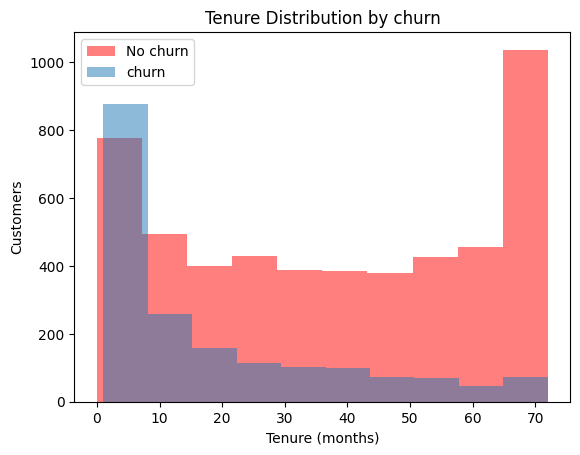

In [11]:
#churn vs tenure 
plt.hist(df[df['Churn'] == 0]['tenure'],alpha=.5,label="No churn",color='red')
plt.hist(df[df['Churn'] == 1]['tenure'],alpha=.5,label="churn")
plt.legend()
plt.xlabel("Tenure (months)")
plt.ylabel("Customers")
plt.title("Tenure Distribution by churn")
plt.show()

In [12]:
# churn vs monthly charges
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_15580\1315965274.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


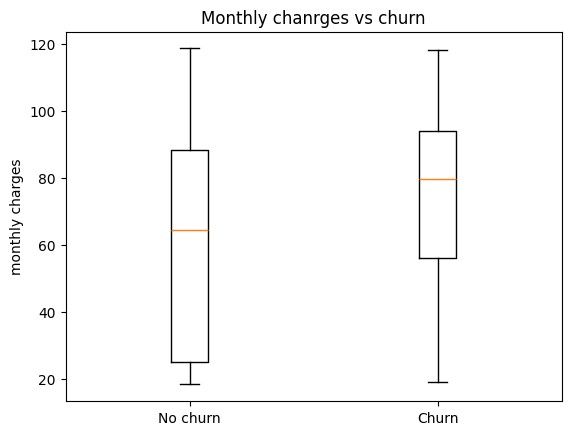

In [13]:
plt.boxplot(
    [df[df['Churn'] == 0]['MonthlyCharges'],df[df['Churn'] == 1]['MonthlyCharges']],
    labels = ["No churn",'Churn']
)
plt.ylabel("monthly charges")
plt.title("Monthly chanrges vs churn")
plt.show()


In [14]:
# churn vs internetservice
pd.crosstab(df['InternetService'],df['Churn'],normalize='index') * 100

Churn,0,1
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [15]:
# churn vs payment method
pd.crosstab(df['PaymentMethod'],df['Churn'],normalize='index') * 100

Churn,0,1
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [16]:
# senior cetizen analysis
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index') * 100

Churn,0,1
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [17]:
# lets check the correlationabs
df[['tenure','MonthlyCharges','TotalCharges','Churn']].corr()

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
Churn,-0.352229,0.193356,-0.198324,1.000000


In [18]:
df.to_csv("C:/Users/Admin/Projects/ML projects/ml-project-02/exploratory-data-analysis(EDA).csv")